In [105]:
# importing libraries
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

In [106]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Loading datasets**

In [107]:
path_to_dataset2 = '/content/drive/MyDrive/MPA-MLF/Miniproject/x_test.csv' # change the PATH
X_test_raw = pd.read_csv(path_to_dataset2)
path_to_dataset3 = '/content/drive/MyDrive/MPA-MLF/Miniproject/x_train.csv' # change the PATH
X_train_raw = pd.read_csv(path_to_dataset3)
path_to_dataset4 = '/content/drive/MyDrive/MPA-MLF/Miniproject/y_train.csv' # change the PATH
y_train_raw = pd.read_csv(path_to_dataset4)


**Preprocessing**

In [ ]:
# Drop some columns
X_test = X_test_raw.drop(['m_power','Tosc','Tmix'], axis=1)
X_train = X_train_raw.drop(['m_power','Tosc','Tmix'], axis=1)
# Define first column as index
X_test = X_test.rename(columns={'Unnamed: 0': 'index'})
X_train = X_train.rename(columns={'Unnamed: 0': 'index'})
y_train = y_train_raw.rename(columns={'id': 'index'})

X_test = X_test.set_index('index')
X_train = X_train.set_index('index')
y_train = y_train.set_index('index')

# Print the modified dataset
X_train

In [109]:
# Split the data into training and testing sets
# define a function for train and test split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)


# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# convert y_train and y_test to categorical
y_train = to_categorical(y_train-1, num_classes=8)
y_val = to_categorical(y_val-1, num_classes=8)


**Creating model**

In [111]:
from keras.layers import Dropout
from keras import regularizers

model = Sequential()
model.add(Dense(128, input_dim=8, activation='sigmoid'))
model.add(Dense(64, activation='sigmoid'))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(8, activation='softmax')) 

**Making optimizer**

In [112]:
from keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/rmsprop.py:143: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


**Training model**

In [ ]:
history = model.fit(X_train, y_train, epochs=200, batch_size=128, validation_split = 0.05)

**Model Evaluation**

In [114]:
loss, accuracy = model.evaluate(X_val, y_val, verbose=0)
print('Accuracy: {:.2f}'.format(accuracy*100))

Accuracy: 100.00


Text(0, 0.5, 'validation loss')

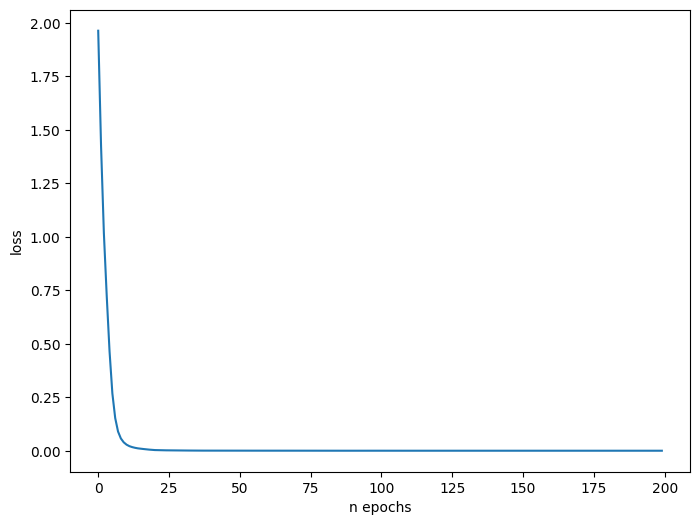

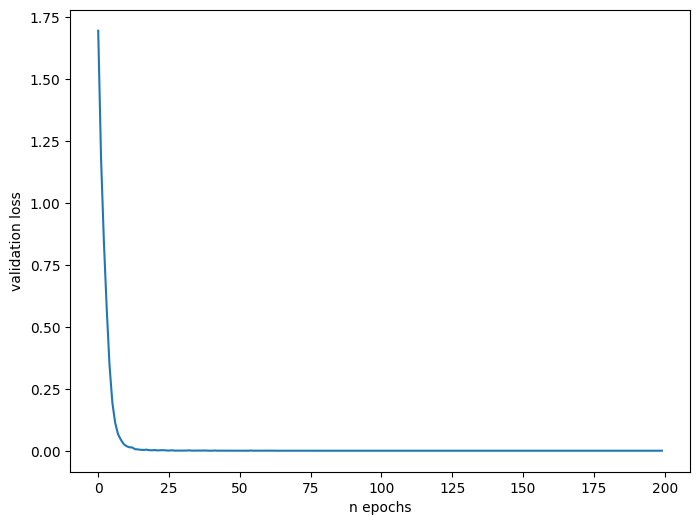

In [115]:
# plotting 
plt.figure(figsize=(8,6))
plt.plot(history.history['loss'])
plt.xlabel('n epochs')
plt.ylabel('loss')

plt.figure(figsize=(8,6))
plt.plot(history.history['val_loss'])     
plt.xlabel('n epochs')
plt.ylabel('validation loss')

Text(0, 0.5, 'validation accuracy')

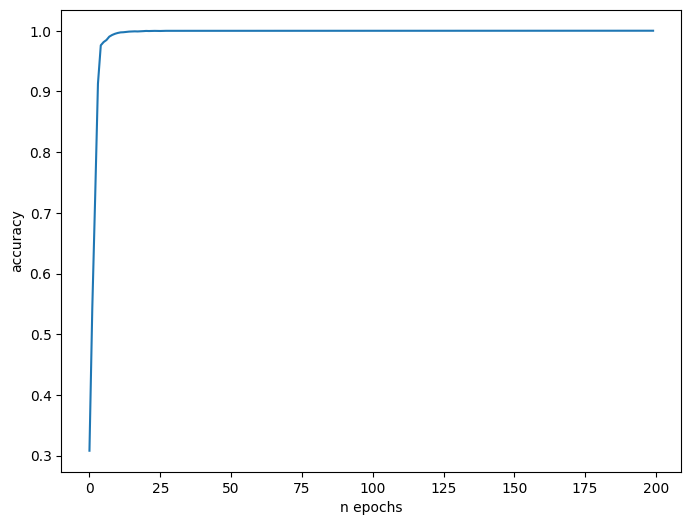

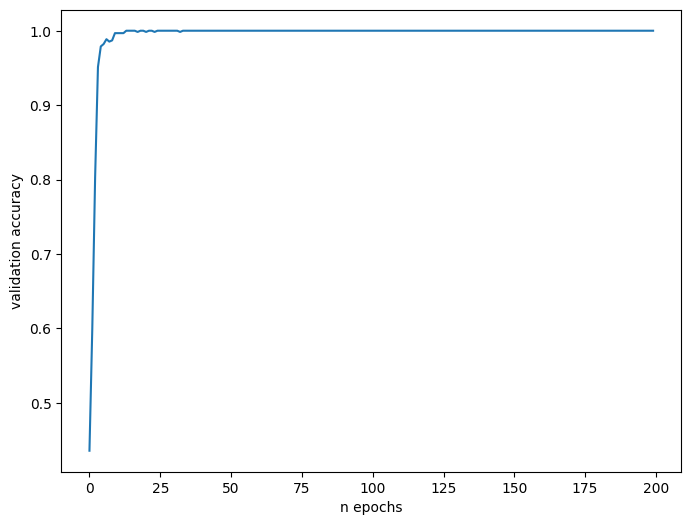

In [116]:
# plotting 
plt.figure(figsize=(8,6))
plt.plot(history.history['accuracy'])
plt.xlabel('n epochs')
plt.ylabel('accuracy')

plt.figure(figsize=(8,6))
plt.plot(history.history['val_accuracy'])
plt.xlabel('n epochs')
plt.ylabel('validation accuracy')

In [117]:
# Make predictions on the X_set data
prediction = model.predict(X_test)

# Save the predictions to a CSV file
prediction = prediction.argmax(axis=1).astype(np.uint8)+1
output_df = pd.DataFrame(prediction, columns=["target"])

output_path = '/content/drive/MyDrive/MPA-MLF/Miniproject/y_test.csv' # change the PATH
output_df.to_csv(output_path, index=True, index_label="id", quoting=2)


120/120 [==============================] - 0s 1ms/step
